# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# IMPORT DATASET

In [2]:
file_path = 'C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# DOWNSAMPLING

In [3]:
target_variable = 'Diabetes_012'
class_0 = df[df[target_variable] == 0]
class_1 = df[df[target_variable] == 1]
class_2 = df[df[target_variable] == 2]
downsampled_size = 4631
class_0_downsampled = class_0.sample(n=downsampled_size, random_state=42)
class_1_downsampled = class_1.sample(n=downsampled_size, random_state=42)
class_2_downsampled = class_2.sample(n=downsampled_size, random_state=42)
f_downsampled = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])
print(f_downsampled)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
162288           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
227646           0.0     1.0       0.0        1.0  32.0     1.0     0.0   
888              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
230094           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
134829           0.0     0.0       0.0        1.0  35.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
66672            2.0     1.0       1.0        1.0  35.0     1.0     0.0   
42017            2.0     1.0       1.0        1.0  32.0     1.0     1.0   
67332            2.0     0.0       0.0        1.0  26.0     1.0     0.0   
251948           2.0     0.0       1.0        1.0  26.0     0.0     0.0   
171966           2.0     1.0       0.0        1.0  29.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
162288                   

# DOWNSAMPLED COUNT

In [4]:
print("Class Distribution in Downsampled Data:")
print(f_downsampled[target_variable].value_counts())
print("Unique Classes in Downsampled Data:", f_downsampled[target_variable].unique())
print("Class Distribution in Downsampled Data:", f_downsampled[target_variable].value_counts())

Class Distribution in Downsampled Data:
Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64
Unique Classes in Downsampled Data: [0. 1. 2.]
Class Distribution in Downsampled Data: Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# DATA SPLIT

In [5]:
X = f_downsampled.drop(target_variable, axis=1)  
y = f_downsampled[target_variable] 
test_size = 0.2  
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size , stratify=y)


# DECISION TREE

In [6]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)
print("Predicted labels for the test set:", y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Predicted labels for the test set: [1. 1. 1. ... 0. 1. 2.]
Accuracy: 40.66210867218424 %
Confusion Matrix:
 [[418 291 218]
 [260 323 343]
 [208 329 389]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.47      0.45      0.46       927
         1.0       0.34      0.35      0.35       926
         2.0       0.41      0.42      0.41       926

    accuracy                           0.41      2779
   macro avg       0.41      0.41      0.41      2779
weighted avg       0.41      0.41      0.41      2779



# DATA VISUALIZATION

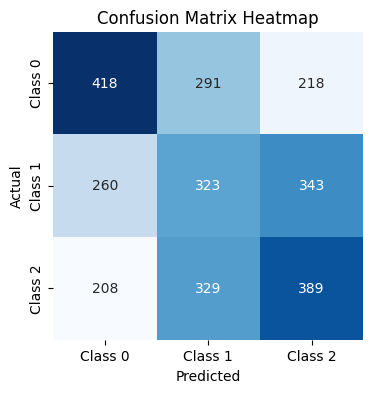

In [7]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# FEATURE RANKING

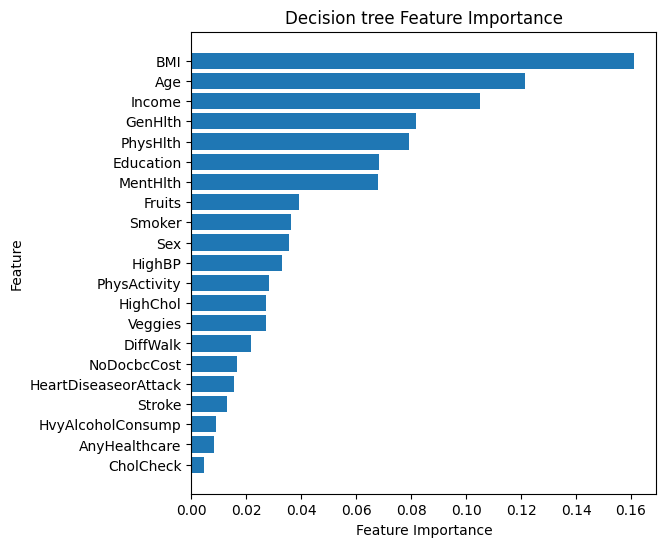

In [8]:
feature_importances = decision_tree_classifier.feature_importances_
feature_names = list(X.columns)
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision tree Feature Importance')
plt.show()